In [49]:
# %matplotlib Qt
%matplotlib inline

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV  # Linear least squares with l2 regularization
from sklearn.metrics import mean_absolute_error, mean_squared_error

from modules import LLS, LLS_3D

In [51]:
data = pd.read_csv('data/HousePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [52]:
# Update dollor price from 30,000 T to 42,000 T
data['Price(USD)'] = data['Price(USD)'] / 30000 * 42000
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,86333.338
1,60,1,True,True,True,Shahran,1.850000e+09,86333.338
2,79,2,True,True,True,Pardis,5.500000e+08,25666.662
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,42116.662
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,326666.662


In [53]:
data['Address_Code'] = data['Address'].astype('category').cat.codes
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Code
0,63,1,True,True,True,Shahran,1.850000e+09,86333.338,156
1,60,1,True,True,True,Shahran,1.850000e+09,86333.338,156
2,79,2,True,True,True,Pardis,5.500000e+08,25666.662,117
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,42116.662,152
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,326666.662,150


In [54]:
# Sort by highest prices in Toman
data_price_sorted = data.sort_values(by='Price', ascending=False).reset_index()
# data_price_sorted.head(5)
print('Addresses of the 5 most expensive houses:')
data_price_sorted[['Address', 'Price']].head(5)

Addresses of the 5 most expensive houses:


,Address,Price
0,Zaferanieh,9.240000e+10
1,Abazar,9.100000e+10
2,Lavasan,8.500000e+10
3,Ekhtiarieh,8.160000e+10
4,Niavaran,8.050000e+10


In [55]:
data.corr(numeric_only=True)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Code
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990,-0.116675
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476,-0.062038
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993,0.019425
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675,0.019546
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417,0.076829
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000,-0.063286
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000,-0.063286
Address_Code,-0.116675,-0.062038,0.019425,0.019546,0.076829,-0.063286,-0.063286,1.000000


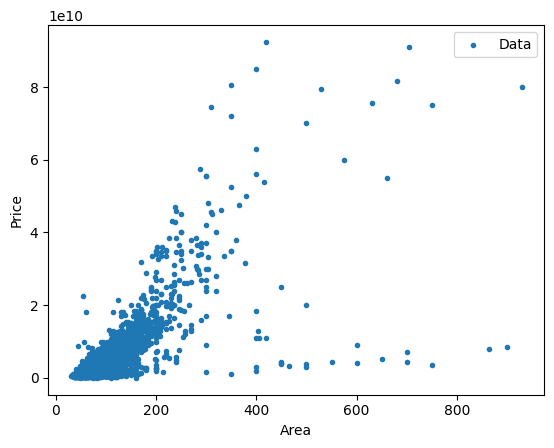

In [56]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(['Data'])
plt.show()

In [57]:
# Prepare features and target
X = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_Code']].astype(float).values
Y = data[['Price']].astype(float).values

print(X.shape)
print(Y.shape)

(3265, 6)
(3265, 1)


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# Normalize the data for better performance (optional)
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

In [60]:
model = LLS()

In [61]:
model.fit(X_train, Y_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 653)

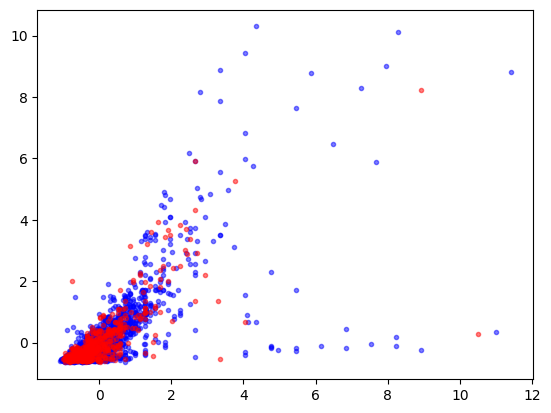

In [62]:
# Plot results
model.plot(X_train[:, 0], X_test[:, 0], Y_train, Y_test, 'blue', 'red', 'Area', 'Price')

In [ ]:
# Evaluate model
mae_lls = model.evaluate(X_test, Y_test, metric='mae')
mse_lls = model.evaluate(X_test, Y_test, metric='mse')
rmse_lls = model.evaluate(X_test, Y_test, metric='rmse')

print(f"LLS MAE: {mae_lls}")
print(f"LLS MSE: {mse_lls}")
print(f"LLS RMSE: {rmse_lls}")

LLS MAE: 0.3296743227840034
LLS MSE: 0.3424020917427641
LLS RMSE: 0.5851513408877775


In [ ]:
# Fit the Linear Regression model
lls_model = LinearRegression()
lls_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = lls_model.predict(X_test)

In [ ]:
# Evaluate with MAE, MSE, RMSE
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2470850664.8549986
MSE: 2.484303498522853e+19
RMSE: 4984278782.856004
